SyriaTelCustomer Churn

Import libraries and obtain Data

In [120]:
# Import the relevant Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [121]:
#Obtain data 

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#view the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [122]:
#Explore and analyze the data
 
def analyze_data(file_path):
    df = pd.read_csv(file_path)

    #check for shape 
    print(df.shape)
# Describe the data
    print(df.describe())

    #print information on the data
    print(df.info())

    # Check formissing values
    print(df.isnull().sum())


    return df

df = analyze_data('bigml_59c28831336c6604c800002a.csv')

(3333, 21)
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084      

There are no null values in the data.

The data size is 3333 rows and 21 columns.

Next we explain what each columns contain?

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

state : Customer's different states.

account_length: active number of days for a customer's account.

area_code : 'customer's location

phone_number : customer's phone number

international_plan : "yes" if the user has the international plan, otherwise "no"

voice_mail_plan : "yes" if the user has the voice mail plan, otherwise "no"

number_vmail_messages : customer has a vmail plan and how many vmail messages do they get

total_day_minutes : total number of call minutes used during the day

total_day_calls : total number of calls made during the day

totalday_charge : day calls' total charge

total_eve_minutes : total number of call minutes used in the evening

total_eve_calls : total calls made in the evening

total_eve_charge : total charge on evening calls

total_night_minutes: Total number of call minutes used at night

total_night_calls : Total number of night calls

total_night_charge : Total charge on night calls

total_intl_minutes : total international minutes used

total_intl_calls : total number of international calls made

total_intl_charge : total charge on international calls

customer_ervice_calls : number of calls made to customer service

churn : boolean on whether the customer left or not

Data Cleaning

From the data analyzation we can observe that:

    1. There are no null values in the data set.
    2. However the column names are wrongly named, so we have to change that then check for duplicates.
    3. since we have both state and area code, we can drop one since they both refer to a geographical location where the client resides

In [124]:
# remove the whitespaces so as to make the column names easily addressible
df.columns = df.columns.str.replace(' ', '_')

#view the data to confirm changes have been effected.
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [125]:
# dropping the state column
df = df.drop('state', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

# 3.4 Unique Identifier

From the column analysis, we see that Phone number is the unique Identifier and it we do not expect the same phone number to be used by two different Customers.


In [126]:
#check unique values 
df.phone_number.unique


<bound method Series.unique of 0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object>

we clean the phone number by changing it to integer data type from object data type.

In order to do this, we need to remove the '-' 

In [127]:
# convert to integer
df['phone_number'] = df['phone_number'].str.replace('-', '').astype(int)

# checking if changes have been effected
df.phone_number

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 3333, dtype: int32

In [130]:
# making phone_number column to be the index column given its the unique identifier
df.set_index('phone_number', inplace=True)

# Check if changes have been effected
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [128]:
# changing categorical data into integer type in churn column
df['churn'] = df['churn'].astype(int) 

#view the data to confirm changes have been effected.
df.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# 4. Exploratory Data Analysis 

The reason for this type of data exploration is to identify possible correlations among the features and distribution of variables, which will be important in modelling.

# 4.1 Univariate Analysis

This will involve analyzing a single variable by examining the distribution of each feature in the dataset to understand its characteristics.

We start with the target variable column churn to identify its distribution, which shows whether the client will churn or not.


churn
0    2850
1     483
Name: count, dtype: int64
percentage of customers churning: 0.14491449144914492


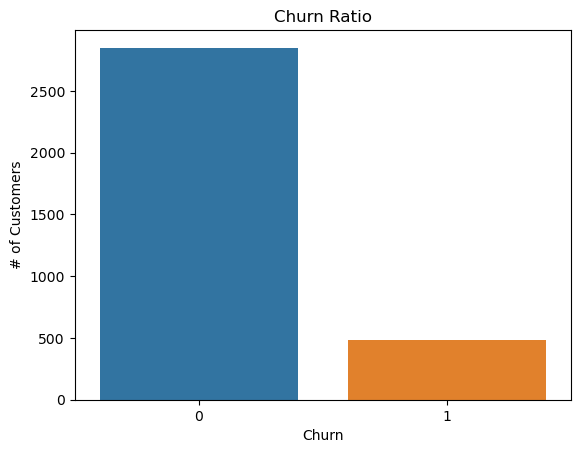

In [144]:
#since churn is the variabele of our intrest we check the number of churn values and do a visualization

print(df['churn'].value_counts()) 

#visualization
sns.countplot(x='churn', data=df) #visualize the churn ratio and 'x' specifies the data for the x-axis.

plt.title('Churn Ratio') # Add a title to the plot
plt.xlabel('Churn') # Add a label to the x-axis
plt.ylabel('# of Customers')# Add a label to the y-axis

plt.savefig("Ratio of Churn") # Save the plot to use in other notebooks

#percentage of customers churning
Percent_churn = 483/(2850+483)
print("percentage of customers churning:",Percent_churn)
 

Separating the categorical and numerical variables in our dataset

In [148]:
cat_vars = []
num_vars = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)

# Remove the target variable if it's included in the list of numerical variables
if 'target_variable_name' in num_vars:
    num_vars.remove('target_variable_name')

print("-------------------------------------------------------------------------------------------------------------------")
print('Categorical variables:', cat_vars)
print("-------------------------------------------------------------------------------------------------------------------")
print('Numerical variables:', num_vars)
print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
Categorical variables: ['international_plan', 'voice_mail_plan']
-------------------------------------------------------------------------------------------------------------------
Numerical variables: ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']
-------------------------------------------------------------------------------------------------------------------
